In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st

### **Ana: Educación(Q4)]**

In [10]:
df_formacion=pd.read_csv('df_modificado1.csv')
df_formacion.head(2)

,Unnamed: 0,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,gender_def,continent
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man,Asia


In [5]:
df_formacion['education_q4'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: education_q4, dtype: int64

In [6]:
df_formacion['education_q4'].count()
#no tenemos ni nulos ni registros vacios para formación

25973

In [7]:
df_formacion.duplicated().sum()

0

In [8]:
df_formacion.isnull().sum()

Unnamed: 0           0
index                0
time                 0
age                  0
gender               0
                 ...  
Q38_B_Part_10    23226
Q38_B_Part_11    21431
Q38_B_OTHER      25596
gender_def         355
continent            0
Length: 245, dtype: int64

### Nos quedamos con las columnas que seleccionamos en el grupo para las preguntas, que no tiene duplicados con un total de 25973 registros

In [11]:
df_def_fomacion=df_formacion.loc[:,[ 'index', 'time', 'age', 'gender','gender_def','continent','country_q3','education_q4','role_q5','experience_q6','sector_q20','company_size_q21','anual_income_q25']]
df_def_fomacion

,index,time,age,gender,gender_def,continent,country_q3,education_q4,role_q5,experience_q6,sector_q20,company_size_q21,anual_income_q25
0,0,910,50-54,Man,Man,Asia,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999"
1,1,784,50-54,Man,Man,Asia,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999"
2,2,924,22-24,Man,Man,Asia,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",$0-999
3,3,575,45-49,Man,Man,North America,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees","30,000-39,999"
4,4,781,45-49,Man,Man,Asia,India,Doctoral degree,Other,< 1 years,Academics/Education,50-249 employees,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,1756,30-34,Man,Man,Africa,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Computers/Technology,"10,000 or more employees","15,000-19,999"
25969,25969,253,22-24,Man,Man,Asia,China,Master’s degree,Student,1-3 years,NaN,NaN,NaN
25970,25970,494,50-54,Man,Man,Europe,Sweden,Doctoral degree,Research Scientist,I have never written code,Academics/Education,"1000-9,999 employees",$0-999
25971,25971,277,45-49,Man,Man,North America,United States of America,Master’s degree,Data Scientist,5-10 years,Online Service/Internet-based Services,"10,000 or more employees",NaN


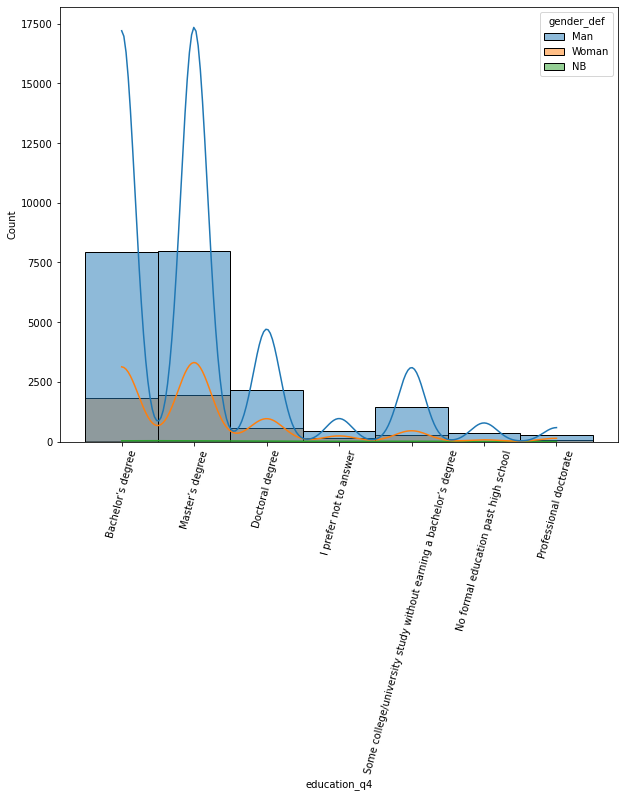

In [12]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion['education_q4'],data = df_formacion, hue='gender_def', kde=True)
plt.xticks(rotation= 75)
plt.show()

### Como tenemos muchos estudiantes, cruzaré los datos por un lado, con estudiantes incluido, y por otro, en la población que trabaja, que la voy a aproximar con los que han contestado el salario

In [13]:
df_def_fomacion.isnull().sum()

index                   0
time                    0
age                     0
gender                  0
gender_def            355
continent               0
country_q3              0
education_q4            0
role_q5                 0
experience_q6           0
sector_q20           9648
company_size_q21     9722
anual_income_q25    10582
dtype: int64

In [14]:
def porcentaje(df):
    array2=[]
    for i in df.columns:
        for v in df[i]:
            print(i)
        z=v*100/df[i].sum()
        array2.append(z)
        
    return  np.round(np.array(array2), decimals=2)
    
    #funcion para hallar porcentajes
    #print(z)
    #tamaño_genero["Woman%"] =tamaño_genero_porcentaje (tamaño_genero["'Woman"].apply(porcentaje))

In [ ]:
for col in df.columns:
    print("------------------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos")
    z=col*100/df[col].sum()
    array2.append(z)
    print(df[col].unique())
    print("\n", "
      return  np.round(np.array(array2), decimals=2)

In [ ]:
for col in categoricas.columns:
    print("------------------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos")
    print(pd.DataFrame(df[col].value_counts()))
    print("\n", "------------------------------------------------------------", "\n")

In [17]:
educacion_gen2=pd.DataFrame(pd.crosstab(df_formacion['gender_def'],df_formacion['education_q4'], margins=True))
educacion_gen2



education_q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree,All
gender_def,,,,,,,,
Man,7928,2171,445,7995,360,270,1429,20598
NB,45,15,6,36,8,3,17,130
Woman,1843,565,140,1950,44,81,267,4890
All,9816,2751,591,9981,412,354,1713,25618


In [ ]:
educacion_gen2_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['gender'],df_formacion_sin_inactivos['education_q4'], margins=True))
educacion_gen2_no_null

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_def_fomacion['education_q4'],data = df_def_fomacion, hue='gender')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion_sin_inactivos['education_q4'],data = df_formacion_sin_inactivos, hue='gender')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
educacion_gen3=pd.DataFrame(pd.crosstab(df_def_fomacion['role_q5'],df_def_fomacion['education_q4'], margins=True).reset_index())
educacion_gen3

In [ ]:
educacion_gen3_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['role_q5'],df_formacion_sin_inactivos['education_q4'], margins=True).reset_index())
educacion_gen3_no_null

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_def_fomacion['role_q5'],data = df_def_fomacion, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion_sin_inactivos['role_q5'],data = df_formacion_sin_inactivos, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
educacion_gen4=pd.DataFrame(pd.crosstab(df_def_fomacion['anual_income_q25'],df_def_fomacion['education_q4'], margins=True))
educacion_gen4

In [ ]:
educacion_gen4_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['anual_income_q25'],df_formacion_sin_inactivos['education_q4'], margins=True))
educacion_gen4_no_null

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_def_fomacion['anual_income_q25'],data = df_def_fomacion, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion_sin_inactivos['anual_income_q25'],data = df_formacion_sin_inactivos, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
educacion_gen5=pd.DataFrame(pd.crosstab(df_def_fomacion['company_size_q21'],df_def_fomacion['education_q4'], margins=True).reset_index())
educacion_gen5

In [ ]:
educacion_gen5_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['company_size_q21'],df_formacion_sin_inactivos['education_q4'], margins=True).reset_index())
educacion_gen5_no_null

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_def_fomacion['education_q4'],data = df_def_fomacion, hue='company_size_q21')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion_sin_inactivos['education_q4'],data = df_formacion_sin_inactivos, hue='company_size_q21')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
educacion_gen6=pd.DataFrame(pd.crosstab(df_def_fomacion['country_q3'],df_def_fomacion['education_q4'], margins=True).reset_index())
educacion_gen6

In [ ]:
educacion_gen6_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['country_q3'],df_formacion_sin_inactivos['education_q4'], margins=True).reset_index())
educacion_gen6_no_null

In [ ]:
plt.figure(figsize =(20,15))
sns.histplot(x=df_def_fomacion['country_q3'],data = df_def_fomacion, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(20,15))
sns.histplot(x=df_formacion_sin_inactivos['country_q3'],data = df_formacion_sin_inactivos, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
educacion_gen7=pd.DataFrame(pd.crosstab(df_def_fomacion['experience_q6'],df_def_fomacion['education_q4'], margins=True))
educacion_gen7

In [ ]:
educacion_gen7_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['experience_q6'],df_formacion_sin_inactivos['education_q4'], margins=True))
educacion_gen7_no_null

Los datos ue menos varian segun empleabilidad y experiencia, son los de los doctorados

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_def_fomacion['education_q4'],data = df_def_fomacion, hue='experience_q6')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion_sin_inactivos['education_q4'],data = df_formacion_sin_inactivos, hue='experience_q6')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
educacion_gen8=pd.DataFrame(pd.crosstab(df_def_fomacion['sector_q20'],df_def_fomacion['education_q4'], margins=True).reset_index())
educacion_gen8

In [ ]:
educacion_gen8_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['sector_q20'],df_formacion_sin_inactivos['education_q4'], margins=True).reset_index())
educacion_gen8_no_null

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_def_fomacion['sector_q20'],data = df_def_fomacion, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion_sin_inactivos['sector_q20'],data = df_formacion_sin_inactivos, hue='education_q4')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
educacion_gen9=pd.DataFrame(pd.crosstab(df_def_fomacion['age'],df_def_fomacion['education_q4'], margins=True).reset_index())
educacion_gen9

In [ ]:
educacion_gen9_no_null=pd.DataFrame(pd.crosstab(df_formacion_sin_inactivos['age'],df_formacion_sin_inactivos['education_q4'], margins=True).reset_index())
educacion_gen9_no_null

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_def_fomacion['education_q4'],data = df_def_fomacion, hue='age')#, kde=True)
plt.xticks(rotation= 75)
plt.show()

In [ ]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_formacion_sin_inactivos['education_q4'],data = df_formacion_sin_inactivos, hue='age')
plt.xticks(rotation= 75)
plt.show()



En general, a mayor edad, mayor formacion, los doctorados, van bajando la proporcion con la edad, a la vez que va subiendo la licenciatura casi. El grado de master, mas o menos se mantiene, an los activos.